# preferable do the following in a virtual environment as tensorflow needs to be downgraded to v1 to be compatible with sagemaker

In [ ]:
!pip install tensorflow==1.15.5

In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
#from keras.models import Sequential
#from keras import models, layers
#from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LSTM, GRU, Bidirectional

In [2]:
#make sure the tensorflow version using is 1.15.5
tf.__version__

'1.15.5'

In [3]:
dataset_p1 = 'keypoint_part1.csv'
dataset_p2 = 'keypoint_part2.csv'
dataset_p3 = 'keypoint_part3.csv'
dataset_p4 = 'data.csv'
model_save_path = 'newModel.hdf5'

In [4]:
NUM_CLASSES = 29
RANDOM_SEED = 42

In [5]:
X_dataset1 = np.loadtxt(dataset_p1, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset1 = np.loadtxt(dataset_p1, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_dataset2 = np.loadtxt(dataset_p2, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset2 = np.loadtxt(dataset_p2, delimiter=',', dtype='int32', usecols=(0))
y_dataset2 = y_dataset2+10

In [7]:
X_dataset3 = np.loadtxt(dataset_p3, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset3 = np.loadtxt(dataset_p3, delimiter=',', dtype='int32', usecols=(0))
y_dataset3 = y_dataset3+20

In [8]:
X_dataset4 = np.loadtxt(dataset_p4, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset4 = np.loadtxt(dataset_p4, delimiter=',', dtype='int32', usecols=(0))

In [9]:
concat_x = np.concatenate((X_dataset1,X_dataset2),axis=0)
concat_x = np.concatenate((concat_x,X_dataset3),axis=0)
concat_x = np.concatenate((concat_x,X_dataset4),axis=0)

In [10]:
concat_y = np.concatenate((y_dataset1,y_dataset2),axis=0)
concat_y = np.concatenate((concat_y,y_dataset3),axis=0)
concat_y = np.concatenate((concat_y,y_dataset4),axis=0)
print(concat_y.shape)

(70789,)


In [11]:
concat_x.shape

(70789, 42)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(concat_x, concat_y, train_size=0.75, random_state=RANDOM_SEED)

In [13]:
### Validation data
x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(X_train
                                                                              ,y_train
                                                                              ,test_size=.2
                                                                              ,random_state=RANDOM_SEED
                                                                              ,shuffle=True)

In [84]:

model = tf.keras.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(29, activation='softmax')
])

In [85]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 4096)              176128    
_________________________________________________________________
dropout_19 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 29)                118813    
Total params: 294,941
Trainable params: 294,941
Non-trainable params: 0
_________________________________________________________________


In [86]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

In [87]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [88]:
#import numpy as np
#series_input_train = np.expand_dims(X_train, axis=-1)

In [89]:
#best model 9.1Mb : loss: 0.3844 - accuracy: 0.8755 - val_loss: 0.3243 - val_accuracy: 0.8951 
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=512,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback,tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)]
)

Train on 53091 samples, validate on 17698 samples
Epoch 1/1000
52224/53091 [============================>.] - ETA: 0s - loss: 1.1574 - acc: 0.7351
Epoch 00001: saving model to newModel.hdf5
53091/53091 [==============================] - 5s 94us/sample - loss: 1.1484 - acc: 0.7369 - val_loss: 0.5572 - val_acc: 0.8796
Epoch 2/1000
52224/53091 [============================>.] - ETA: 0s - loss: 0.4736 - acc: 0.8841
Epoch 00002: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 83us/sample - loss: 0.4730 - acc: 0.8844 - val_loss: 0.4038 - val_acc: 0.9045
Epoch 3/1000
52224/53091 [============================>.] - ETA: 0s - loss: 0.3688 - acc: 0.9075
Epoch 00003: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 81us/sample - loss: 0.3686 - acc: 0.9076 - val_loss: 0.3346 - val_acc: 0.9187
Epoch 4/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.3217 - acc: 0.9190
Epoch 00004: saving model to newModel.hdf5
53091/

52736/53091 [============================>.] - ETA: 0s - loss: 0.1203 - acc: 0.9647
Epoch 00031: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 78us/sample - loss: 0.1201 - acc: 0.9648 - val_loss: 0.1447 - val_acc: 0.9619
Epoch 32/1000
52224/53091 [============================>.] - ETA: 0s - loss: 0.1195 - acc: 0.9647
Epoch 00032: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 82us/sample - loss: 0.1192 - acc: 0.9649 - val_loss: 0.1454 - val_acc: 0.9605
Epoch 33/1000
52224/53091 [============================>.] - ETA: 0s - loss: 0.1201 - acc: 0.9639
Epoch 00033: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 81us/sample - loss: 0.1201 - acc: 0.9639 - val_loss: 0.1423 - val_acc: 0.9615
Epoch 34/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9658
Epoch 00034: saving model to newModel.hdf5
53091/53091 [==============================] - 5s 87us/sample - lo

Epoch 62/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.0836 - acc: 0.9735
Epoch 00062: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 84us/sample - loss: 0.0836 - acc: 0.9735 - val_loss: 0.1275 - val_acc: 0.9667
Epoch 63/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.0836 - acc: 0.9738
Epoch 00063: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 77us/sample - loss: 0.0837 - acc: 0.9738 - val_loss: 0.1314 - val_acc: 0.9662
Epoch 64/1000
52224/53091 [============================>.] - ETA: 0s - loss: 0.0843 - acc: 0.9729
Epoch 00064: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 82us/sample - loss: 0.0845 - acc: 0.9729 - val_loss: 0.1291 - val_acc: 0.9671
Epoch 65/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.0825 - acc: 0.9739
Epoch 00065: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 82

In [90]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=512)

17698/17698 [==============================] - 0s 19us/sample - loss: 0.1305 - acc: 0.9662


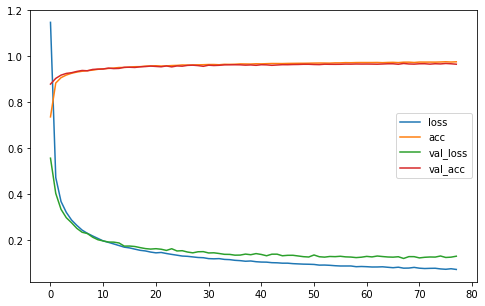

In [93]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# Save Model

In [94]:
model.save(model_save_path, include_optimizer=False)

# Visualize

In [96]:
model = tf.keras.models.load_model(model_save_path)
predict_result = model.predict(np.array([X_test[0]]))
#print(np.squeeze(predict_result))
#print(np.argmax(np.squeeze(predict_result)))

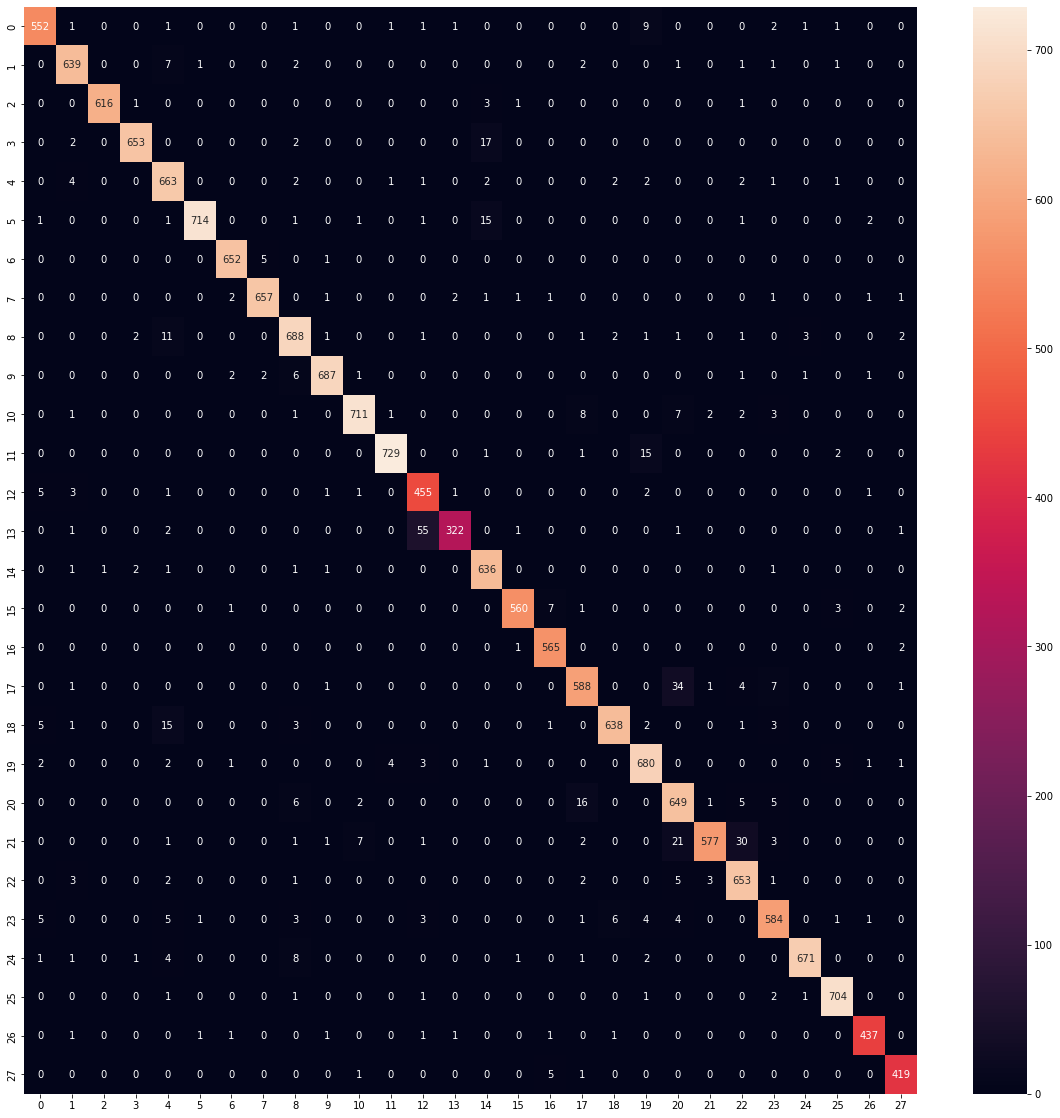

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       571
           1       0.97      0.98      0.97       655
           2       1.00      0.99      0.99       622
           3       0.99      0.97      0.98       674
           4       0.92      0.97      0.95       681
           5       1.00      0.97      0.98       737
           6       0.99      0.99      0.99       658
           7       0.99      0.98      0.99       668
           8       0.95      0.96      0.95       714
           9       0.99      0.98      0.98       701
          10       0.98      0.97      0.97       736
          11       0.99      0.97      0.98       748
          12       0.87      0.97      0.92       470
          13       0.98      0.84      0.91       383
          14       0.94      0.99      0.96       644
          15       0.99      0.98      0.98       574
          16       0.97      0.99      0.98       568
     

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)